<h3> NBA 5 year careeer prediction using XBoost Classifier

In [1]:
import pandas as pd
import numpy as np

<h4> 1. Load processed sets

<h5> Loading scaled training, validation and test sets from data_prep step saved on the data/processed folder saving them into X_train, X_val, y_train, y_val, X_test, X_test_ID variables

In [2]:
#Load Test and validation sets using custom function load_sets
from src.data.sets import load_sets

In [3]:
X_train, X_val, y_train, y_val, X_test, X_test_ID = load_sets()

<h5> Reviewing weight of the minority vs mayority class to be used from the imported sets that had been re-sampled. As we can see, the training sets are 50% balanced

In [4]:
# calculating weights for unbalanced data validation
sum_wpos = len([item for item in y_train if item==1 ])
sum_wneg = len([item for item in y_train if item==0 ])
sum_wneg/sum_wpos

0.9981255857544518

<h4> 2. Import Random Forest

<h5> Importing and fitting Random Forest Classifier

In [5]:
import xgboost as xgb

In [6]:
#ml_model = xgb.XGBClassifier(objective='binary:logistic', 
                              #objective='binary:hinge',
                              #booster='gbtree', 
                              #eta=0.2, # OK
                              #max_depth=10, #testing
                              #n_estimators=200, #testing
                              #subsample=0.7,
                              #validate_parameters=True,
                              #max_delta_step=8, #testing. 8ok
                              #seed=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
ml_model = LogisticRegression()

<h4> 2.2 Importing predictors names saved

<h5> As column importance is given in order of appearance on the scaled set, importing column names saved in data_prep for easy visualization and identification will be performed

<h5> Importing predictor column names and combining with relevant columns to find out the best feature predictors

In [7]:
predictors  = pd.read_csv('../data/interim/predictor_names.csv')

In [8]:
predictors_df = predictors.copy()

In [9]:
predictors = predictors['names'].tolist()

<h4> 3. Train RF Classifier with new calculated training sets

<h5> Next up, the RF classifier will be imported and trained with the new training set and saved into the models folder

In [10]:
ml_model.fit(X_train, y_train , early_stopping_rounds=10, 
              eval_metric='auc', eval_set=[(X_val,y_val)])

[0]	validation_0-auc:0.64893
[1]	validation_0-auc:0.66903
[2]	validation_0-auc:0.66375
[3]	validation_0-auc:0.67350
[4]	validation_0-auc:0.67705
[5]	validation_0-auc:0.67845
[6]	validation_0-auc:0.67606
[7]	validation_0-auc:0.67763
[8]	validation_0-auc:0.67974


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-auc:0.67698
[10]	validation_0-auc:0.66927
[11]	validation_0-auc:0.66446
[12]	validation_0-auc:0.66456
[13]	validation_0-auc:0.66552
[14]	validation_0-auc:0.66260
[15]	validation_0-auc:0.66276
[16]	validation_0-auc:0.66242
[17]	validation_0-auc:0.66100
[18]	validation_0-auc:0.66117


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

<h5> After the model has been fitted, it will be saved in the models folder in case it needs to be re-called on a later process

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
#Save model in the models folder
#from joblib import dump
#dump(rf_model, '../models/RF5.joblib')

<h4> 3.1 Generate predictions for training and validation sets in order to compare accuracy and AUROC

<h5> The fitted model will be used to predict the validation and test set

In [13]:
y_val_preds = ml_model.predict(X_val)

In [14]:
y_trainpreds = ml_model.predict(X_train)

<h4> 3.2 Calculate model score in training and validation sets to assess fitting accuracy

In [15]:
ml_model.score(X_train, y_train)

0.7876172607879925

In [16]:
ml_model.score(X_val, y_val)

0.655625

<h5> The training model shows a perfect fit with the training set, however, the model score drops to 0.82 on the validation set suggesting there is overfitting in the training set

<h4> 4 Analysis of the validation set

<h5> 4.1 Confusion Matrix

<h5> Analysis of the results will be done through a confusion matrix and AUROC to gather insights as to where the accuracy/innacuracy exists in order to improve the model in future experiments <br> <br> We'll look into a confusion matrix to see the distribution of the predictions from the model

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

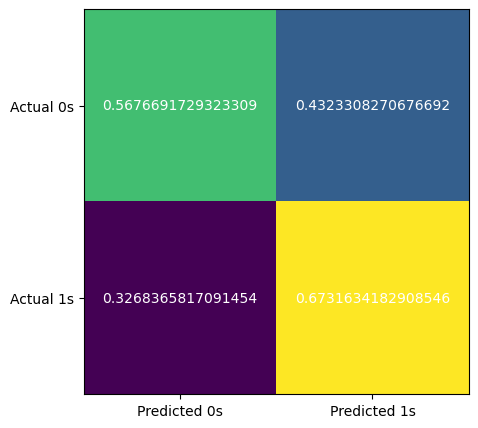

In [18]:
cm = confusion_matrix(y_val, y_val_preds , normalize='true'
                     )

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

<h5> As seen in the confusion matrix, 92% of true positive target was predicted correctly, however, 97% of negative target was predicted incorrectly (false positive)

<h5> 4.2 AUROC

In [19]:
import scikitplot as skplt
import matplotlib.pyplot as plt

In [20]:
y_val_prob = ml_model.predict_proba(X_val)

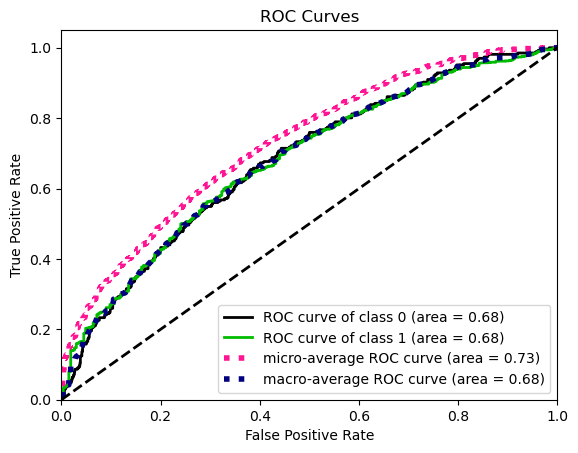

In [21]:
skplt.metrics.plot_roc(y_val, y_val_prob)
plt.show()

<h5> When analysing AUROC on the validation set, the mean ROC AUC is 0.67, meaning the model is predicting only 69% of the instances correctly

<h5> 4.3 Analysis of false positives vs positives to identify patterns

<h5> Analysing true positives vs false positives as this is where the model is not accurately predicting the target

In [22]:
X_val_df = pd. DataFrame(X_val, columns = predictors)

In [23]:
y_val_list = y_val.tolist()
X_val_df['y_val']=y_val_list

In [24]:
X_val_df['y_val_preds']=y_val_preds

In [25]:
#True Negatives
X_val_true_neg = X_val_df[(X_val_df['y_val']==0)&(X_val_df['y_val_preds']==0)]
X_val_true_neg.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,Min_per_GP,3P_per_GP,Stl_per_GP,Blk_per_GP,Reb_per_GP,ORtg,PPP,TSP,y_val,y_val_preds
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.0,151.0
mean,45.304636,11.928477,4.136424,1.601987,3.998675,40.310596,0.355629,1.013907,22.356291,0.734437,...,0.277843,0.008907,0.010527,0.009985,0.042120,78.010512,0.780105,0.462959,0.0,0.0
std,13.425346,5.086051,2.171957,0.851937,2.098380,5.578974,0.256550,0.755781,14.614863,0.493430,...,0.126533,0.008031,0.006457,0.024473,0.027700,11.068489,0.110685,0.055281,0.0,0.0
min,4.000000,2.900000,0.800000,0.300000,0.800000,27.500000,0.000000,0.000000,0.000000,0.000000,...,0.082979,0.000000,0.001852,0.000000,0.006383,44.426494,0.444265,0.333333,0.0,0.0
25%,37.000000,8.300000,2.550000,0.950000,2.350000,36.350000,0.100000,0.500000,11.000000,0.400000,...,0.195658,0.003479,0.006253,0.002000,0.023431,71.261461,0.712615,0.425560,0.0,0.0
50%,47.000000,11.400000,4.000000,1.500000,3.800000,39.800000,0.300000,0.800000,20.800000,0.700000,...,0.251111,0.007143,0.009804,0.005000,0.033333,77.197150,0.771971,0.460025,0.0,0.0
75%,54.000000,15.450000,5.450000,2.000000,5.200000,43.800000,0.500000,1.400000,31.500000,0.900000,...,0.330804,0.012034,0.013270,0.008248,0.051800,83.346263,0.833463,0.488013,0.0,0.0
max,72.000000,26.500000,11.100000,4.000000,10.500000,58.100000,1.400000,3.900000,73.700000,2.900000,...,0.950000,0.046667,0.043750,0.200000,0.162162,128.406709,1.284067,0.717213,0.0,0.0


In [26]:
X_val_true_neg.shape

(151, 29)

In [27]:
#False Positive
X_val_false_pos = X_val_df[(X_val_df['y_val']==0)&(X_val_df['y_val_preds']==1)]
X_val_false_pos.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,Min_per_GP,3P_per_GP,Stl_per_GP,Blk_per_GP,Reb_per_GP,ORtg,PPP,TSP,y_val,y_val_preds
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,...,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.0,115.0
mean,62.852174,17.586957,6.800000,2.601739,5.854783,44.400870,0.395652,1.147826,23.777391,1.288696,...,0.284042,0.006692,0.009674,0.006356,0.049130,85.983008,0.859830,0.512578,0.0,1.0
std,14.138565,6.983986,3.205642,1.271205,2.809515,5.547791,0.255944,0.708884,15.730014,0.735058,...,0.107538,0.004714,0.006060,0.011589,0.031466,10.520379,0.105204,0.048923,0.0,0.0
min,27.000000,4.900000,1.300000,0.500000,1.100000,31.700000,0.000000,0.000000,0.300000,0.100000,...,0.096053,0.000000,0.000000,0.000000,0.006154,62.611807,0.626118,0.408401,0.0,1.0
25%,53.500000,12.450000,4.500000,1.700000,3.600000,40.650000,0.200000,0.600000,11.700000,0.800000,...,0.212702,0.003460,0.005196,0.001924,0.022381,78.477774,0.784778,0.485553,0.0,1.0
50%,63.000000,16.700000,6.200000,2.400000,5.700000,43.900000,0.400000,1.100000,23.200000,1.100000,...,0.257447,0.006098,0.008929,0.003750,0.041558,85.014409,0.850144,0.516262,0.0,1.0
75%,72.500000,21.600000,9.200000,3.450000,7.450000,47.250000,0.500000,1.500000,32.000000,1.800000,...,0.338237,0.009010,0.012404,0.008020,0.065844,92.311668,0.923117,0.538112,0.0,1.0
max,93.000000,38.100000,15.800000,6.200000,14.800000,58.100000,1.100000,3.200000,72.800000,4.200000,...,0.656897,0.023077,0.032609,0.118182,0.186842,119.132290,1.191323,0.653786,0.0,1.0


In [28]:
X_val_false_pos.shape

(115, 29)

In [29]:
# True Positives
X_val_true_pos = X_val_df[(X_val_df['y_val']==1)&(X_val_df['y_val_preds']==1)]
X_val_true_pos.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,Min_per_GP,3P_per_GP,Stl_per_GP,Blk_per_GP,Reb_per_GP,ORtg,PPP,TSP,y_val,y_val_preds
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.0,898.0
mean,70.811804,21.645546,8.769822,3.389866,7.326615,46.423274,0.392316,1.125724,21.209800,1.712584,...,0.306244,0.005738,0.010596,0.005978,0.055834,88.689445,0.886894,0.523966,1.0,1.0
std,14.560419,9.162834,4.422552,1.750795,3.750917,5.772986,0.272396,0.783623,13.521277,0.932354,...,0.113470,0.004171,0.005786,0.010526,0.028652,9.410286,0.094103,0.048684,0.0,0.0
min,25.000000,4.000000,1.000000,0.400000,1.100000,27.500000,0.000000,0.000000,0.100000,0.000000,...,0.085106,0.000000,0.001299,0.000000,0.007143,65.274151,0.652742,0.355450,1.0,1.0
25%,61.000000,15.000000,5.400000,2.100000,4.600000,42.525000,0.200000,0.500000,10.400000,1.000000,...,0.223465,0.002532,0.006452,0.002439,0.034726,82.461551,0.824616,0.493239,1.0,1.0
50%,70.000000,19.800000,7.850000,3.000000,6.500000,46.200000,0.300000,1.000000,19.350000,1.600000,...,0.291968,0.005032,0.009459,0.004054,0.051759,88.090481,0.880905,0.520833,1.0,1.0
75%,81.000000,27.475000,11.200000,4.300000,9.500000,50.175000,0.600000,1.600000,30.400000,2.200000,...,0.368525,0.008219,0.013454,0.006579,0.070419,94.207787,0.942078,0.551788,1.0,1.0
max,115.000000,59.400000,30.300000,12.000000,28.600000,63.600000,1.300000,4.000000,72.300000,7.000000,...,0.962162,0.027027,0.040541,0.225000,0.257576,130.813953,1.308140,0.724249,1.0,1.0


In [30]:
X_val_true_pos.shape

(898, 29)

In [31]:
# False Negative
X_val_false_neg = X_val_df[(X_val_df['y_val']==1)&(X_val_df['y_val_preds']==0)]
X_val_false_neg.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,Min_per_GP,3P_per_GP,Stl_per_GP,Blk_per_GP,Reb_per_GP,ORtg,PPP,TSP,y_val,y_val_preds
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,...,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.0,436.0
mean,50.931193,13.710321,4.796789,1.841284,4.413303,41.899083,0.364450,1.055046,21.376606,0.898624,...,0.277560,0.007496,0.010308,0.006500,0.043642,81.047075,0.810471,0.480510,1.0,0.0
std,12.598845,5.529911,2.586355,1.000893,2.347345,5.916243,0.287913,0.820091,14.133301,0.582147,...,0.107659,0.006388,0.006332,0.009549,0.026898,10.931036,0.109310,0.056068,0.0,0.0
min,10.000000,4.100000,1.000000,0.400000,1.100000,27.500000,0.000000,0.000000,0.000000,0.000000,...,0.088060,0.000000,0.000000,0.000000,0.007246,54.207537,0.542075,0.357521,1.0,0.0
25%,44.000000,9.900000,3.000000,1.100000,2.700000,37.600000,0.100000,0.400000,9.325000,0.500000,...,0.198161,0.003008,0.006000,0.001961,0.026087,73.717145,0.737171,0.442629,1.0,0.0
50%,51.000000,12.600000,4.300000,1.600000,3.900000,41.650000,0.300000,0.900000,19.200000,0.800000,...,0.251482,0.006339,0.008772,0.004082,0.036201,79.787234,0.797872,0.474785,1.0,0.0
75%,60.000000,16.800000,6.100000,2.400000,5.600000,45.625000,0.500000,1.500000,31.525000,1.200000,...,0.348093,0.010345,0.013333,0.007018,0.053803,89.193857,0.891939,0.515238,1.0,0.0
max,87.000000,37.900000,16.000000,6.400000,14.700000,62.600000,1.700000,4.700000,62.600000,3.500000,...,0.737778,0.050000,0.044444,0.104478,0.168293,118.938701,1.189387,0.689290,1.0,0.0


In [32]:
X_val_false_neg.shape

(436, 29)

<h5> True positives have very similar statistics than false positives making it difficult for the model to correclty classify the observations from that boundary <br> <br>
    additional sampling experimentation needs to be done for the observations in this boundary
    

<h4> 5 Generate predictions on the test set for Kaggle submission

<h5> The final step is to generate the prediction probabilities from the test set in order to evaluate the score from Kaggle via csv upload

In [33]:
y_test_preds = ml_model.predict_proba(X_test)

In [34]:
#Create Data Frame for Doc printing
df =pd.DataFrame()

In [35]:
y_test_preds

array([[0.71436584, 0.28563413],
       [0.4868273 , 0.5131727 ],
       [0.21738541, 0.7826146 ],
       ...,
       [0.6399026 , 0.36009738],
       [0.26312327, 0.7368767 ],
       [0.39202565, 0.60797435]], dtype=float32)

In [36]:
target_prob = y_test_preds
target_prob = [item[1] for item in y_test_preds]

In [37]:
df['Id'] = X_test_ID
df['TARGET_5Yrs'] = target_prob

In [38]:
df.head()

,Id,TARGET_5Yrs
0,0,0.285634
1,1,0.513173
2,2,0.782615
3,3,0.890414
4,4,0.584440


In [39]:
#Saving predictions into csv
#df.to_csv('../data/external/Kaggle_submission_RF_ncr_all_cols.csv', index=False)

<h5> Kaggle submission score is 0.68 which is in line with the AUROC metric